## Ordinary Least Squares (OLS) regression

In [6]:
import tensorflow as tf
import numpy as np

In [7]:
# Creating small 1D toy dataset with 10 training samples
X_train=np.arange(10).reshape((10,1))
y_train=np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

In [8]:
class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim=x_dim
        self.learning_rate=learning_rate
        self.g=tf.Graph()
        ## Build the model
        with self.g.as_default():
            ## Set graph level random_seed
            tf.set_random_seed(random_seed)
            self.build()
            ## Create initializer
            self.init_op=tf.global_variables_initializer()
    
    def build(self):
        ## Define placeholders for inputs
        self.X=tf.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
        self.y=tf.placeholder(dtype=tf.float32, shape=(None), name='y_input')
        print(self.X)
        print(self.y)
        
        ## Define weight matrix and bias vector
        w=tf.Variable(tf.zeros(shape=(1)), name='weight')
        b=tf.Variable(tf.zeros(shape=(1)), name='bias')
        print(w)
        print(b)
        
        self.z_net=tf.squeeze(w*self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_errors=tf.square(self.y-self.z_net, name='sqr_errors')
        print(sqr_errors)
        
        self.mean_cost=tf.reduce_mean(sqr_errors, name='mean_cost')
        
        optimizer=tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer=optimizer.minimize(self.mean_cost)

In [9]:
lrmodel=TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [10]:
# Function for training the model
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## initialize all variables: W and b
    sess.run(model.init_op)
    training_costs=[]
    for i in range(num_epochs):
        _, cost=sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
        training_costs.append(cost)
    return training_costs

In [11]:
import time
# Creating session
sess=tf.Session(graph=lrmodel.g)
tic=time.time()
training_costs=train_linreg(sess, lrmodel, X_train, y_train)
toc=time.time()
print('Training time:',(toc-tic)*1000,'ms')
print(training_costs)

Training time: 906.5155982971191 ms
[32.431, 6.0113096, 1.446125, 0.65659344, 0.51936322, 0.4948352, 0.48978764, 0.48811454, 0.48703355, 0.48606348]


In [12]:
# plotting the training cost to check convergence
import matplotlib.pyplot as plt
%matplotlib inline

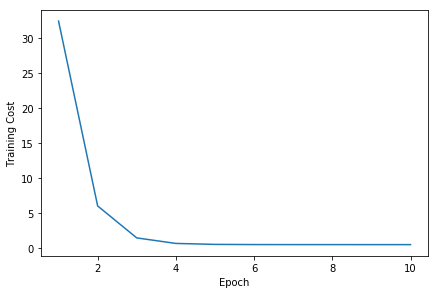

In [13]:
plt.plot(range(1,len(training_costs)+1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')

In [14]:
def predict_linreg(sess, model, X_test):
    y_pred=sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

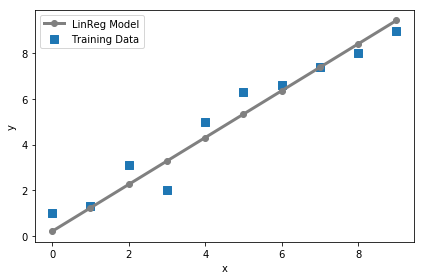

In [15]:
# Plotting linear regression fit on the training data
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]), predict_linreg(sess, lrmodel, X_train), color='gray', marker='o', markersize=6, linewidth=3, label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()